### Counterfactual explanation for text classification

An example of counterfactual explanation on sentiment analysis. The method implemented in the library is based on the Polyjuice model developed by Wu et al. Please cite the work: https://github.com/tongshuangwu/polyjuice if using this explainer.

In [1]:
# This default renderer is used for sphinx docs only. Please delete this cell in IPython.
import plotly.io as pio
pio.renderers.default = "png"

In [2]:
import transformers
import numpy as np
from omnixai.data.text import Text
from omnixai.explainers.nlp.counterfactual.polyjuice import Polyjuice

In [3]:
# A transformer model for sentiment analysis
model = transformers.pipeline(
    'sentiment-analysis',
    model='distilbert-base-uncased-finetuned-sst-2-english',
    return_all_scores=True
)
idx2label = {"NEGATIVE": 0, "POSITIVE": 1}

In [4]:
# Build the prediction function, e.g., the outputs of the prediction function are the class probabilities.
def _predict(x):
    scores = []
    predictions = model(x.values)
    for pred in predictions:
        score = [0.0, 0.0]
        for d in pred:
            if d['label'] == 'NEGATIVE':
                score[0] = d['score']
            else:
                score[1] = d['score']
        scores.append(score)
    return np.array(scores)

In [5]:
# Initialize the counterfactual explainer based on Polyjuice
explainer = Polyjuice(predict_function=_predict)

INFO:polyjuice.polyjuice_wrapper:Setup Polyjuice.
INFO:polyjuice.polyjuice_wrapper:Setup SpaCy processor.
INFO:polyjuice.polyjuice_wrapper:Setup perplexity scorer.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


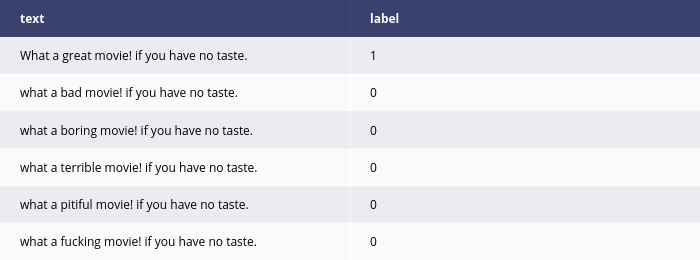

In [6]:
x = Text([
    "What a great movie! if you have no taste.",
    "it was a fantastic performance!",
    "best film ever",
    "such a great show!",
    "it was a horrible movie",
    "i've never watched something as bad"
])
explanations = explainer.explain(x)
explanations.ipython_plot()